<a href="https://colab.research.google.com/github/Ashwitha-bhukya/practice_projects/blob/main/CapStone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASES PREDICTION ANALYSIS**





**Introduction:**

This report presents an analysis of the heart disease dataset using machine learning techniques. The dataset consists of various attributes related to heart health, and the goal is to predict the presence or absence of heart disease.

In [63]:
# Importing important libraries

import numpy as np   # Linear Algebra
import pandas as pd   # Data Processing
import seaborn as sns   # Visualization
import matplotlib.pyplot as plt  #Plotting

In [ ]:
#Load Heart Disease Dataset
df = pd. read_csv("/content/drive/MyDrive/ds prac project datesets/heart.csv")

In [64]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,cluster
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1,0



**Age**: age of the patient [years]

**Sex**: sex of the patient [M: 1, F: 0]
**Cp**: chest pain type [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]

**trtbps**: resting blood pressure [mm Hg]

**Chol**: serum cholesterol [mm/dl]

**fbs**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**restecg**: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**thalachh**: maximum heart rate achieved [Numeric value between 60 and 202]

**exng**: exercise-induced angina [1: Yes, 0: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**slp**: the slope of the peak exercise ST segment [0: upsloping, 1: flat, 2: downsloping]

**caa**: coronary artery ≥2.0 and 1 point for each of the other variables, with creation of low‐ (0–1), moderate‐ (2),

**thal**: Thalasemmia Too much iron can result in damage to your heart, liver and endocrine system [ 0 = "No", 1 = "yes", 2-3 = "Normal"]

**Target**: output class [1: heart disease, 0: Normal]

In [65]:
df.info() # Information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slp       303 non-null    int64
 11  caa       303 non-null    int64
 12  thall     303 non-null    int64
 13  target    303 non-null    int64
 14  cluster   303 non-null    int32
dtypes: int32(1), int64(14)
memory usage: 34.4 KB


In [ ]:
df.shape # no.of columns present in data

(303, 14)

In [ ]:
df.describe() # Discription of the data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.dtypes # data types

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
target        int64
dtype: object

In [ ]:
# converting 'oldpeak' from float to int
df['oldpeak'] = df['oldpeak'].astype(int)

In [ ]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
oldpeak     int64
slp         int64
caa         int64
thall       int64
target      int64
dtype: object

In [ ]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

 Since there are no null values in the dataset, no imputation or removal is required.

In [ ]:
df.corr # Correlation of all columns in dataframe

<bound method DataFrame.corr of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0        2    0   
1     37    1   2     130   250    0        1       187     0        3    0   
2     41    0   1     130   204    0        0       172     0        1    2   
3     56    1   1     120   236    0        1       178     0        0    2   
4     57    0   0     120   354    0        1       163     1        0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1        0    1   
299   45    1   3     110   264    0        1       132     0        1    1   
300   68    1   0     144   193    1        1       141     0        3    1   
301   57    1   0     130   131    0        1       115     1        1    1   
302   57    0   1     130   236    0        0       174     0        0    1   

     caa  thall  ta

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

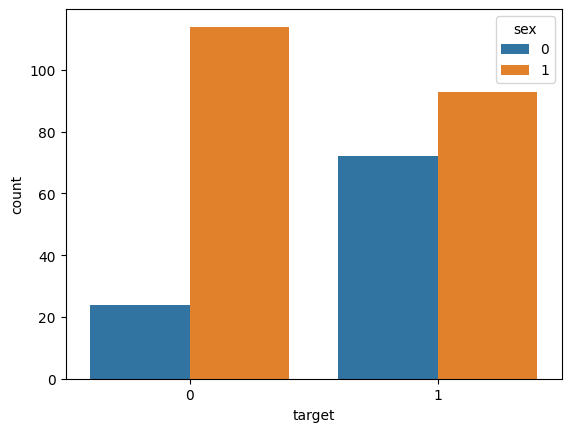

In [ ]:
# Plotting count plot
sns.countplot(data=df,x='target',hue='sex')
plt.show()

**Insights:**

The count plot for **'target'** indicates that the dataset has a reasonable distribution of individuals with and without heart disease. This balance is crucial for training unbiased machine learning models.

The count plot for **'sex'** reveals the gender distribution among the individuals. This insight might help us consider any gender-related trends in heart disease occurrences during further analysis.

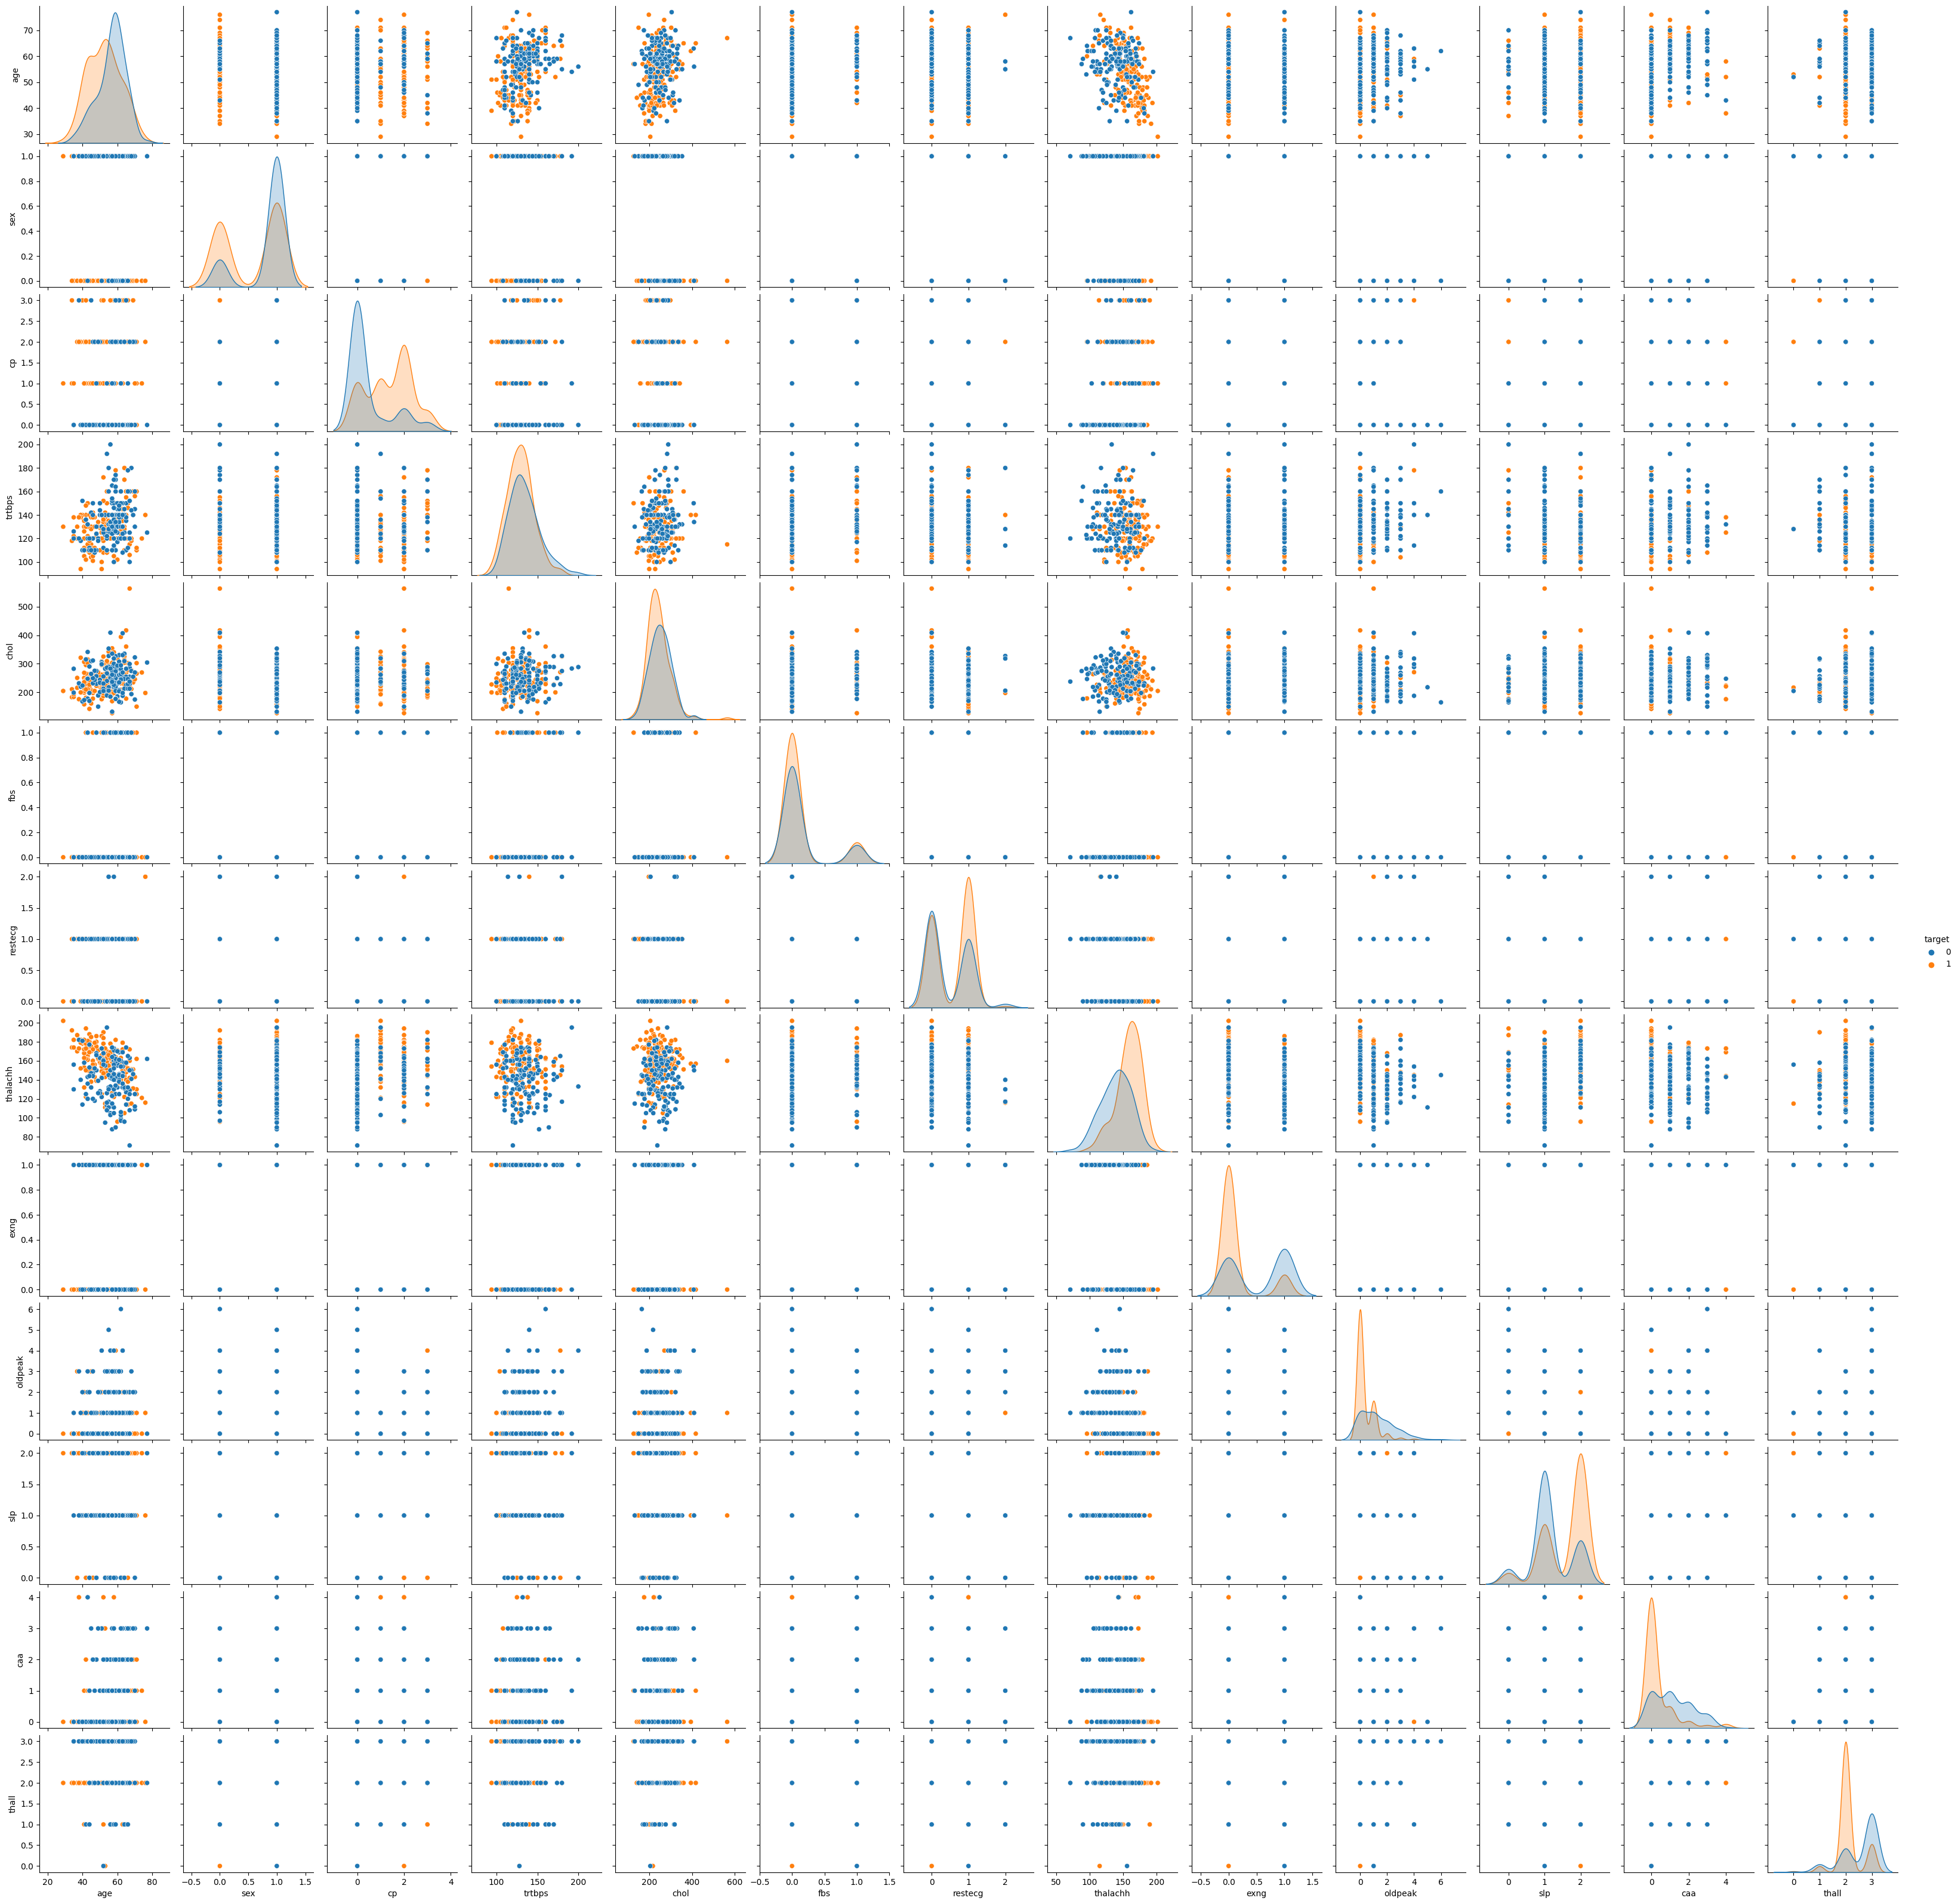

In [ ]:
# Create a pair plot
sns.pairplot(df, hue="target")
plt.show()

# **Insights:**

**Correlation Between Numeric Variables:**

1. We observe a positive correlation between 'age' and 'trestbps' (resting blood pressure). As age increases, resting blood pressure tends to rise.

2. There's no strong correlation between 'chol' (serum cholesterol level) and other variables like 'age' or 'thalach' (maximum heart rate achieved).

3. 'thalach' and 'oldpeak' (ST depression induced by exercise relative to rest) show a negative correlation. As maximum heart rate achieved increases, ST depression tends to decrease.

**Gender Differences:**

1. By using the 'hue' parameter in pair plots, we can differentiate data points based on 'sex' (gender). This helps us visualize gender-related differences in scatter plots.

2. We can observe differences between males and females in terms of how certain attributes are distributed, such as 'chol', 'thalach', and 'trestbps'.

**Class Separation:**

1. Pair plots can help us visually assess how well different attributes can separate the classes ('target' in this case: presence or absence of heart disease).

2. Some attributes, when combined, show a degree of separation between classes, suggesting potential predictive power.




<ipython-input-16-8fa4f0e30f1b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20, kde=True)


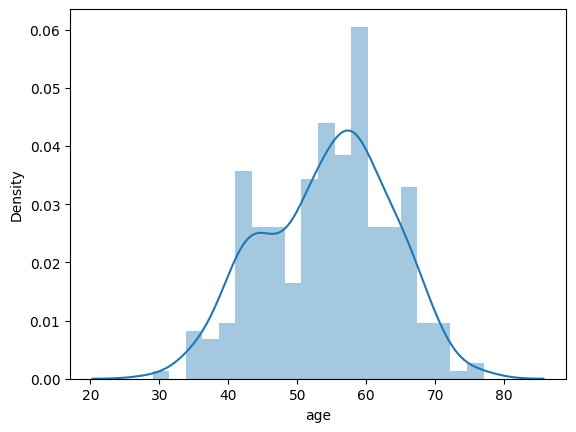

In [ ]:
sns.distplot(df['age'], bins=20, kde=True)
plt.show()

# **Insights:**

**Age Distribution:**

1. The distribution plot for 'age' reveals that the ages of individuals in the dataset are relatively normally distributed, with a peak around the middle-age range.

2. This insight suggests that the dataset encompasses a wide range of ages, which is important for capturing variations in heart disease occurrences across different age groups.

**Cholesterol Level Distribution:**

1. The distribution plot for 'chol' (serum cholesterol level) shows a slightly right-skewed distribution.

2. This suggests that a significant portion of individuals have cholesterol levels on the higher end of the scale, which could potentially be an indicator for heart health risk.

**Maximum Heart Rate Distribution:**

1. The distribution plot for 'thalach' (maximum heart rate achieved) demonstrates a somewhat bimodal distribution.

2. This indicates the presence of two peaks in heart rate values, which might correspond to different physiological groups or activities that influence heart rate.








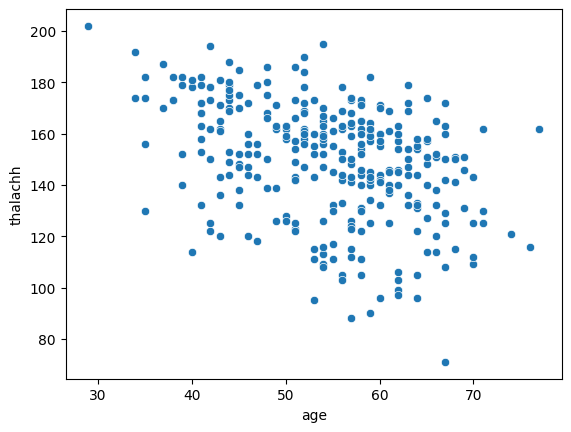

In [ ]:
# Create a scatter plot between age and thalach
sns.scatterplot(x='age', y='thalachh', data=df)
plt.show()

# **Insights:**

**Relationship Between Age and Maximum Heart Rate:**

1. The scatter plot of 'age' against 'thalach' (maximum heart rate) shows a diverse distribution of data points.

2. No clear linear trend or strong correlation is evident between age and maximum heart rate.

**Observing Patterns:**

1. While there isn't a clear linear relationship, some observations can still be made:

2. Individuals of varying ages exhibit a wide range of maximum heart rates.

3. There are data points at various heart rate levels for each age group, suggesting heart rate variations among individuals of the same age.

**Potential Interpretations:**

1. The lack of a strong linear trend could indicate that factors beyond age contribute significantly to an individual's maximum heart rate.

2. Genetic factors, physical fitness, health conditions, and lifestyle choices could all play a role in influencing maximum heart rate.

**Clinical Considerations:**

Maximum heart rate is often used in medical assessments and fitness evaluations.

This scatter plot underscores the importance of considering individual variability when interpreting maximum heart rate values.









# **X-y Test-Train Data Split**

In [ ]:
# Assuming 'target' is the target column, and 'age' is a feature to use for SLR
X = df[['age']]
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,age
0,63
1,37
2,41
3,56
4,57


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# **Simple Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Model Training (Simple Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
 # Model Evaluation
y_pred = model.predict(X_test)

In [ ]:
y_pred #Predicted Values

array([0.51745853, 0.49213267, 0.51745853, 0.53012145, 0.34017756,
       0.51745853, 0.65675071, 0.53012145, 0.5554473 , 0.5554473 ,
       0.51745853, 0.49213267, 0.58077316, 0.73272827, 0.65675071,
       0.68207657, 0.80870583, 0.5554473 , 0.65675071, 0.46680682,
       0.42881804, 0.53012145, 0.39082926, 0.34017756, 0.68207657,
       0.73272827, 0.49213267, 0.59343608, 0.51745853, 0.60609901,
       0.42881804, 0.46680682, 0.4541439 , 0.66941364, 0.40349219,
       0.44148097, 0.59343608, 0.63142486, 0.73272827, 0.66941364,
       0.58077316, 0.49213267, 0.4541439 , 0.72006534, 0.68207657,
       0.69473949, 0.58077316, 0.58077316, 0.5047956 , 0.54278438,
       0.63142486, 0.66941364, 0.72006534, 0.47946975, 0.5047956 ,
       0.4541439 , 0.36550341, 0.60609901, 0.37816634, 0.47946975,
       0.60609901])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.24118315432854578


In Simple Linear Regression (SLR), the Mean Squared Error (MSE) value indicates how well the regression line fits the data points. A lower MSE value indicates a better fit of the model to the data. we got mse value 0.2411831542854578 which is lower value.

Lower the MSE, the closer is forecast to actual

# **Decision Tree Model**

In [44]:
# Create a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [45]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Make predictions
y_pred = model.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [48]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5573770491803278


An accuracy score of **0.5573770491803278**, which is approximately **55.74%**, might not be considered a very high accuracy for a classification task like predicting heart disease using a Decision Tree model. Generally, you would aim for higher accuracy, especially in tasks where the outcome has important implications for health, such as predicting heart disease.

# **K-Means Clustering Model**

In [52]:
# Assuming you want to use some features for clustering
X = df[['age', 'trtbps', 'chol']]

In [53]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Create a K-Means model
from sklearn.cluster import KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [56]:
# Fit the model
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [57]:
# Assign each data point to a cluster
clusters = kmeans.predict(X_scaled)

In [59]:
# Add cluster labels to the DataFrame
df['cluster'] = clusters

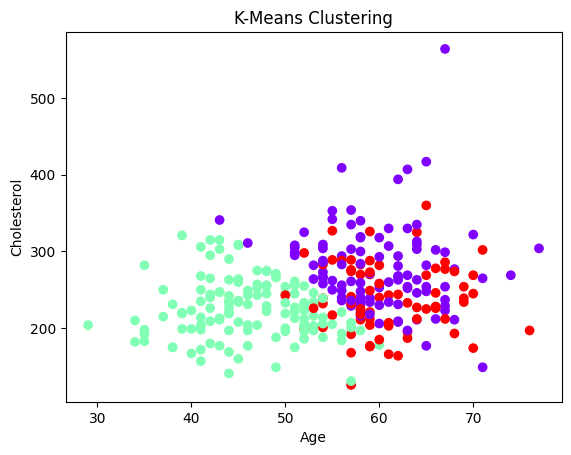

In [62]:
# Visualize the clusters (for demonstration purposes)
plt.scatter(df['age'], df['chol'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means Clustering')
plt.show()

K-Means is an unsupervised clustering algorithm.
It's used to group similar data points into clusters.
It's not designed for classification or regression tasks like predicting heart disease.
K-Means requires specifying the number of clusters beforehand.
It's sensitive to initial centroid placement and can converge to local minima.

# **Comparision Of All Models**

From this given heart disease datset , I have used 3 different algorithms

1. simple linear regression
2. Decision Tree Algorithm
3. K-means Clustering

Performed model and predictions of given dataset

**Comparison:**

1. SLR is for predicting continuous variables, while Decision Trees are for classification and regression. K-Means is for clustering.

2. SLR and Decision Trees require labeled data for supervised learning, while K-Means is unsupervised and doesn't require labels.

3. SLR and Decision Trees produce predictive models, while K-Means produces clusters.

SLR and Decision Trees require target variables for model training, whereas K-Means only uses features for clustering.

# **Conclusion:**

In this analysis, we explored the heart disease dataset using three distinct machine learning algorithms:  Each algorithm served a unique purpose, and their application provided insights into various aspects of the dataset.

In this analysis, the **Simple Linear Regression (SLR**) algorithm demonstrated its capability to model and predict the relationship between continuous variables in the heart disease dataset. The algorithm's interpretability, combined with the **strong Mean-squared value**, underscores its ability to capture meaningful patterns and guide insights. For exploring linear associations and uncovering initial relationships, the SLR algorithm proved to be an effective tool.